<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import matplotlib.colors as colors
import numpy as np

In [3]:
cmap = cm.spring

In [4]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

# Construct the Location of the Charges

## Set Values for q

Not needed for this problem, but in problems where the charges/distances are not all the same, this can be used for scaling.

In [5]:
q = 1
a = 1

Note that for a charge at position $a\hat{x}$ the electric field at $(x,y)$ is given by

$$\vec{E} \hspace{3mm}= \hspace{3mm}\frac{q}{4 \pi \epsilon_0}\frac{1}{[(x-a)^2+y^2]^{3/2}} \cdot (x-a, y) \hspace{3mm} = \hspace{3mm}\frac{q}{4 \pi \epsilon_0 a^2}\frac{1}{[(x/a-1)^2+(y/a)^2]^{3/2}} \cdot (x/a-1, y/a) $$

and thus it is easier to plot the dimensionless quantity

$$ \left(\frac{4 \pi \epsilon_0 a^2}{q} \right)\vec{E} \hspace{3mm} = \hspace{3mm} \frac{1}{[(x/a-1)^2+(y/a)^2]^{3/2}} \cdot (x/a-1, y/a)$$

which conveys all the necessary information about the electric field.

## Define the Electric Field for this Problem

Takes in the charge $q$ and location of the charge $\vec{R}$ - returns the electric field at an arbitrary point $\vec{X}=(x/a, y/a)$.

In [6]:
def elec_field(q, R, x, y):
    rx = R[0]; ry = R[1]
    return (q/((x-rx)**2+(y-ry)**2)**(3/2))*np.array([x-rx, y-ry])

Defines the specific charge arrangement.

In [7]:
def charge_arrangement(x, y):
    pnt_1, q1 = np.array([0, a]), q
    pnt_2, q2 = np.array([0, -a]), q
    pnt_3, q3 = np.array([a, 0]), -q
    pnt_4, q4 = np.array([-a, 0]), -q
    
    return (elec_field(q1, pnt_1, x, y) + elec_field(q2, pnt_2, x, y) + 
        elec_field(q3, pnt_3, x, y) + elec_field(q4, pnt_4, x, y) )

# Get the Magnitude and Direction of the Field

Define a meshgrid and compute the vector field and strength of the vector field.

In [8]:
# Compute the direction
X_d, Y_d = np.meshgrid(np.arange(-2*a-0.1, 2*a+0.1, .2), np.arange(-2*a-0.1, 2*a+0.1 , .2))

U_d, V_d = charge_arrangement(X_d, Y_d)
norm = np.sqrt(U_d**2+V_d**2) # strength of the field
U_d= U_d/norm; V_d=V_d/norm # normalized vectors

# Compute the magnitude (use a more dense grid)
X_m, Y_m = np.meshgrid(np.arange(-2*a-0.1, 2*a+0.1, .02), np.arange(-2*a-0.1, 2*a+0.1 , .02))

U_m, V_m = charge_arrangement(X_m, Y_m)
mag = np.sqrt(U_m**2+V_m**2) # strength of the field

# Plot

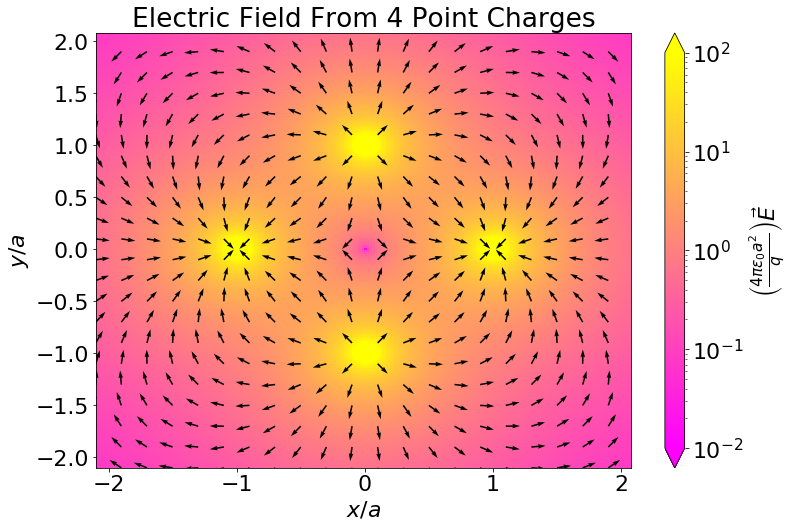

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

cs1 = ax.pcolor(X_m, Y_m, mag, cmap=cmap, norm=colors.LogNorm(vmin=0.01, vmax=100))
cbar = fig.colorbar(cs1, ax=ax, extend='both', label=r'$\left(\frac{4 \pi \epsilon_0 a^2}{q}\right)\vec{E}$')

Q = ax.quiver(X_d, Y_d, U_d, V_d, units='width')
ax.set_title('Electric Field From 4 Point Charges')
ax.set_xlabel('$x/a$')
ax.set_ylabel('$y/a$')

plt.show()